#### Obtain vibrational energy levels and rotational temperatures for some small molecules from QM calculation (e.g. using Gaussian); calculate their Cv at various temperatures and compare with tabulated values

(Computational resources were provided by the e-INFRA CZ project (ID:90254), supported by the Ministry of Education, Youth and Sports of the Czech Republic. https://metavo.metacentrum.cz/)

***

Gaussian job setup for a frequency calculation using CCSD method and correlation-consistent polarized valence triple-zeta basis set:

```
%chk=l04_qmcalc.chk
#p opt freq ccsd/cc-pvtz

opt + freq on co2

0 1
C  0.0  0.0  0.0
O -1.0  0.0  0.0
O  1.0  0.0  0.0
```

Frequency information retrieved from the log file of the finished calculation:
```
 Harmonic frequencies (cm**-1), IR intensities (KM/Mole), Raman scattering
 activities (A**4/AMU), depolarization ratios for plane and unpolarized
 incident light, reduced masses (AMU), force constants (mDyne/A),
 and normal coordinates:
                      1                      2                      3
                     PIU                    PIU                    SGG
 Frequencies --    684.5137               684.5137              1389.7091
 Red. masses --     12.8774                12.8774                15.9949
 Frc consts  --      3.5550                 3.5550                18.2004
 IR Inten    --     34.3245                34.3245                 0.0000
  Atom  AN      X      Y      Z        X      Y      Z        X      Y      Z
     1   6     0.00   0.88   0.00     0.88  -0.00   0.00     0.00  -0.00  -0.00
     2   8    -0.00  -0.33   0.00    -0.33   0.00  -0.00    -0.00   0.00   0.71
     3   8    -0.00  -0.33  -0.00    -0.33   0.00  -0.00     0.00   0.00  -0.71
                      4
                     SGU
 Frequencies --   2434.6980
 Red. masses --     12.8774
 Frc consts  --     44.9746
 IR Inten    --    709.2532
  Atom  AN      X      Y      Z
     1   6    -0.00  -0.00   0.88
     2   8     0.00   0.00  -0.33
     3   8     0.00   0.00  -0.33
...
 -------------------
 - Thermochemistry -
 -------------------
 Temperature   298.150 Kelvin.  Pressure   1.00000 Atm.
 Atom     1 has atomic number  6 and mass  12.00000
 Atom     2 has atomic number  8 and mass  15.99491
 Atom     3 has atomic number  8 and mass  15.99491
 Molecular mass:    43.98983 amu.
 Principal axes and moments of inertia in atomic units:
                           1         2         3
     Eigenvalues --     0.00000 153.49903 153.49903
           X           -0.00000   1.00000   0.00000
           Y           -0.00000   0.00000   1.00000
           Z            1.00000   0.00000   0.00000
 This molecule is a prolate symmetric top.
 Rotational symmetry number  2.
 Rotational temperature (Kelvin)      0.56426
 Rotational constant (GHZ):          11.757346
 Zero-point vibrational energy      31063.6 (Joules/Mol)
                                    7.42439 (Kcal/Mol)
 Vibrational temperatures:    984.86   984.86  1999.48  3502.99
          (Kelvin)
 
 Zero-point correction=                           0.011832 (Hartree/Particle)
 Thermal correction to Energy=                    0.014438
 Thermal correction to Enthalpy=                  0.015382
 Thermal correction to Gibbs Free Energy=        -0.008854
 Sum of electronic and zero-point Energies=           -188.286840
 Sum of electronic and thermal Energies=              -188.284234
 Sum of electronic and thermal Enthalpies=            -188.283290
 Sum of electronic and thermal Free Energies=         -188.307525
 
                     E (Thermal)             CV                S
                      KCal/Mol        Cal/Mol-Kelvin    Cal/Mol-Kelvin
 Total                    9.060              6.798             51.008
 Electronic               0.000              0.000              0.000
 Translational            0.889              2.981             37.270
 Rotational               0.592              1.987             13.069
 Vibrational              7.579              1.830              0.669

```

#### Interlude on Energy minimizations, Hessian and Frequency calculation

Quantum chemistry calculations are a complicated and computationally expensive ordeal, however it is often useful to know what happens in the background\
Let us have an arbitrary quadratic function of three variables standing in as a potential energy surface:

$E(x,y,z)=2x^2+3y^2+3z^2+xy-2xz+4yz+2x+y+1$

(Plotted below for literally no reason)

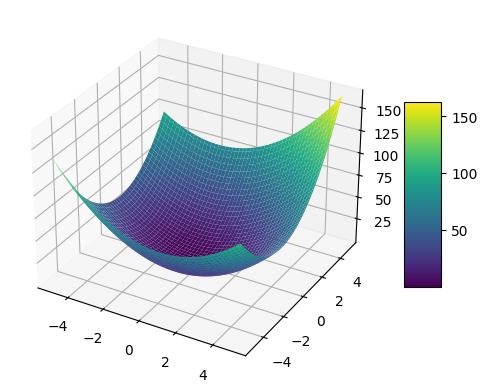

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function E(x,y,z)
def E(x, y, z):
    return 2*x**2 + 3*y**2 + 3*z**2 + x*y - 2*x*z + 4*y*z + 2*x + y + 1

# Create a grid of values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
z = np.linspace(-5, 5, 100)

# Since it's a 3D plot, we will create a meshgrid for x and y, and then calculate z
X, Y = np.meshgrid(x, y)
Z = E(X, Y, 0)  # We can only plot 2 variables at a time, so we'll set z=0

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

# Show the plot
plt.show()


Gradient **g** of this function at the point $(x_0,y_0,z_0)$

$\nabla E = \big( \frac{\partial E}{\partial x}, \frac{\partial E}{\partial y}, \frac{\partial E}{\partial z} \big)$

$\frac{\partial E}{\partial x}=4x+y-2z+2 $

$\frac{\partial E}{\partial y}=x+6y+4z+1 $

$\frac{\partial E}{\partial z}=-2x+4y+6z $

$\nabla E(x,y,z)=(4x+y-2z+2,x+6y+4z+1,-2x+4y+6z)$

So for instance for a point $(1,1,1)$

$\nabla E(1,1,1)=(5,12,8)$

Hessian matrix **H**\
Hessian matrix is a square matrix of second-order partial derivates of a scalar function, whose determinant is called Hessian. Generally the Hessian matrix is used to determine function extrema, thus finds its use in quantum chemistry - characterizing extrema and curvature of the potential energy surface. 

#### Analysing calculation results

We can see from the log above that CO2 has 4 vibrational modes:
- ($\nu_1 = 684(2) \; cm^{-1}$) => degenerate bending modes
- ($\nu_2 = 1389 \; cm^{-1}$) => symmetric strech
- ($\nu_3 = 2434 \; cm^{-1}$) => antisymmetric strech

With the following associated vibrational temperatures:
- $\nu_1: \; 984.86(2) \; K$
- $\nu_2: \; 1999.48 \; K$
- $\nu_3: \; 3502.99 \; K$

Rotational temperature for CO2 can be retrieved from the thermochemistry section of the log:
- $T_{rot} = 0.5643 \; K$

Now let's calculate contributions of these modes to heat capacity of the molecule: \
Heat capacity $C_{V, vib}$ is given as:

$C_{V, vib} = Nk_B \sum^{\alpha}_{n=1} \Big[ \big( \frac{\Theta_{V, n}}{T} \big)^2 \frac{e^{- \Theta_{V, n}/T}}{(e^{-\Theta_{V, n}/T}-1)^2} \Big]$

- $N$ is number of molecules
- $\Theta_{V, n}$ is the characteristic temperature for the $n$-th vibrational mode
- $T$ is temperature
- $\alpha$ is the total number of normal modes

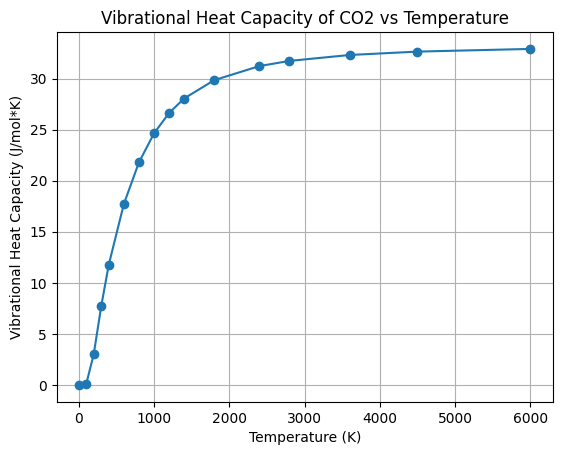

In [20]:
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt

def vibrational_heat_capacity(Theta, T):
    cv_sum = 0
    for theta in Theta:
        cv_sum += (theta / T)**2 * np.exp(- theta / T) / (np.exp(- theta / T) - 1)**2
    
    #print(constants.Boltzmann * cv_sum)
    cv = constants.Avogadro * constants.Boltzmann * cv_sum
    return cv

Theta = [
    984.86,
    984.86,
    1999.48,
    3502.99
]

Temps = [
    10,
    100,
    200,
    300,
    400,
    600,
    800,
    1000,
    1200,
    1400,
    1800,
    2400,
    2800,
    3600,
    4500,
    6000
]

c_vib_plot = []

for temp in Temps:
    c_vib = vibrational_heat_capacity(Theta, temp)
    #print('Temperature: %s; C_vib: %s' % (temp, c_vib))
    c_vib_plot.append(c_vib)

plt.plot(Temps, c_vib_plot, marker='o')
plt.xlabel('Temperature (K)')
plt.ylabel('Vibrational Heat Capacity (J/mol*K)')
plt.title('Vibrational Heat Capacity of CO2 vs Temperature')
plt.grid(True)
plt.show()



| Molecule | Normal Mode Frequencies $[cm^{-1}]$ | Characteristic Temperatures | Rotational Temperature(s) $[K]$ |
| --- | --- | --- | --- |
| $CO_2$ | 684(2) <br /> 1389 <br /> 2434 | 984.86(2) <br /> 1999.48 <br /> 3502.99 | 0.5643 |
| $H_2O$ | 1678 <br /> 3875 <br /> 3979 | 2414.60 <br /> 5575.90 <br /> 5724.61 | 38.96 <br /> 21.17 <br /> 13.72 |
| $CH_4$ | 1355.72 <br /> 1356.05 <br /> 1356.29 <br /> 1581.05 <br /> 1581.11 <br /> 3052.05 <br /> 3168.93 <br /> 3169.27 <br /> 3169.44 | 1950.58 <br /> 1951.06 <br /> 1951.40 <br /> 2274.77 <br /> 2274.86 <br /> 4391.22 <br /> 4559.39 <br /> 4559.87 <br /> 4560.12 | 7.632 <br /> 7.631 <br /> 7.633 |
| $CH_3Cl$| | | |